In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0) # for reproducibility

In [3]:
# dogs have higher ear flappiness index and lower whisker length
# "normal" means gaussian distribution
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10) # mean=5, std=1, n=10
dogs_ear_flappiness_index =  np.random.normal(loc=8, scale=1, size=10) # mean=8, std=1, n=10

In [4]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [5]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [16]:
cat_whisker_length = np.random.normal(loc=8, scale=1, size=10) # mean=8, std=1, n=10
cat_ear_flappiness_index =  np.random.normal(loc=5, scale=1, size=10) # mean=5, std=1, n=10

In [17]:
cat_whisker_length

array([6.95144703, 6.57998206, 6.29372981, 9.9507754 , 7.49034782,
       7.5619257 , 6.74720464, 8.77749036, 6.38610215, 7.78725972])

In [18]:
cat_ear_flappiness_index

array([4.10453344, 5.3869025 , 4.48919486, 3.81936782, 4.97181777,
       5.42833187, 5.06651722, 5.3024719 , 4.36567791, 4.63725883])

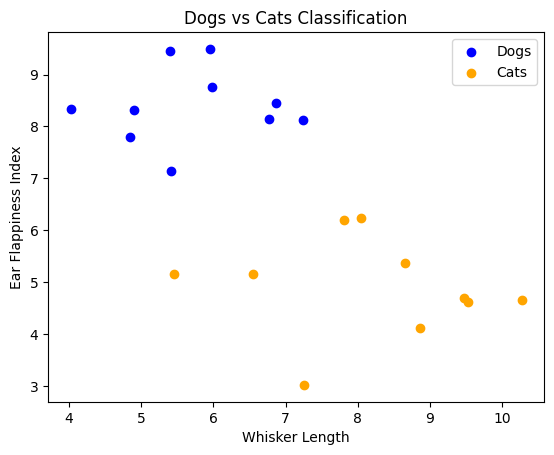

In [9]:
# Plotting the data
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs', color='blue')
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label='Cats', color='orange')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification')
plt.legend()
plt.show()

In [12]:
# Implementing the random line classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):
    # d is the number features, i.e the dimension of the data (2 in this case)
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0

In [10]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0

    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0: # misclassified as cat
            error += 1

    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0: # misclassified as dog
            error += 1
    
    return error

In [13]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cat_whisker_length, cat_ear_flappiness_index)).T

In [14]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [15]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [19]:
# Running the random line classifier
k = 100 # number of iterations
d = 2 # number of features

best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)

In [20]:
best_theta

array([-0.6801782 ,  0.66638308])

In [21]:
best_theta0

-0.4607197873885533

In [22]:
# Plot the decision boundary
x_values = np.linspace(2, 10, 100)
y_values = (-best_theta[0] / best_theta[1]) * x_values - (best_theta0 / best_theta[1])

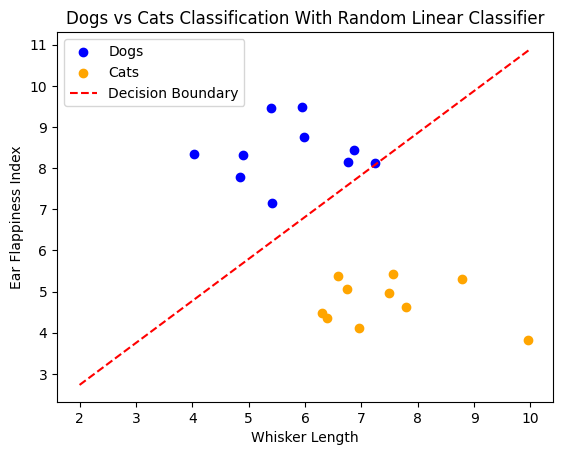

In [24]:
# Plotting the data
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs', color='blue')
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label='Cats', color='orange')
plt.plot(x_values, y_values, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification With Random Linear Classifier')
plt.legend()
plt.show()